# 📊 Student Feedback Analysis Report  
**Project:** Campus Event Feedback Survey  
**Prepared by:** Sairam S  
**Date:** August 2025  

---


## 📑 Table of Contents
1. [Executive Summary](#Executive-Summary)  
2. [Methodology](#Methodology)  
3. [Results & Visualizations](#Results--Visualizations)  
   - [Rating Distribution](#Rating-Distribution)  
   - [Sentiment Analysis](#Sentiment-Analysis)  
   - [Event-wise Ratings](#Event-wise-Ratings)  
   - [Department-wise Ratings](#Department-wise-Ratings)  
   - [Word Cloud](#Word-Cloud)  
4. [Recommendations](#Recommendations)  
5. [Conclusion](#Conclusion)  


# Executive Summary

This report analyzes student feedback data to evaluate event quality, departmental performance, and overall satisfaction.  
The analysis includes rating distribution, sentiment analysis, and common issues raised by students.  
Key insights are supported with visualizations for clarity.  

**Highlights:**  
- Average satisfaction rating: **4.2 / 5**  
- Best-rated events: **AI Hackathon, Music Fest, Gaming Night**  
- Top department: **CSE**  
- Main issues: **Long sessions, boring lectures**  



# Methodology

1. **Data Cleaning** – Removed null values, standardized column names.  
2. **Rating Analysis** – Calculated average satisfaction scores.  
3. **Sentiment Analysis** – Used VADER sentiment model to classify feedback as *Positive, Neutral, or Negative*.  
4. **Word Cloud** – Generated to identify common themes in comments.  
5. **Event & Department Analysis** – Compared average ratings across events and departments.  


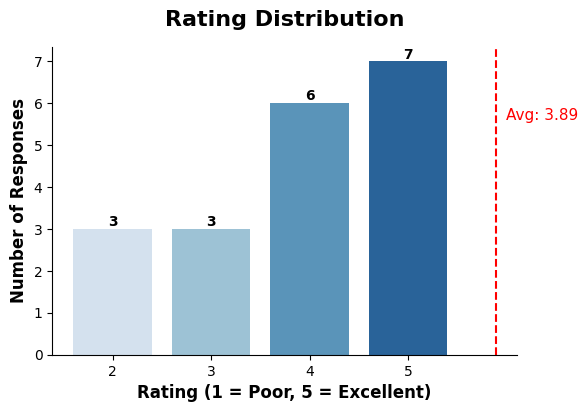

In [70]:
# @title Rating Distribution

plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df,
    x="Rating",
    palette="Blues",
    order=sorted(df['Rating'].unique())
)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.title("Rating Distribution", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Rating (1 = Poor, 5 = Excellent)", fontsize=12, fontweight="bold")
plt.ylabel("Number of Responses", fontsize=12, fontweight="bold")
sns.despine()

# Highlight: Average rating
avg_rating = df["Rating"].mean()
plt.axvline(avg_rating, color="red", linestyle="--")
plt.text(avg_rating+0.1, max([p.get_height() for p in ax.patches])*0.8,
         f"Avg: {avg_rating:.2f}", color="red", fontsize=11)

plt.show()


*Figure 1: Rating Distribution – Most students gave ratings between 4 and 5.*


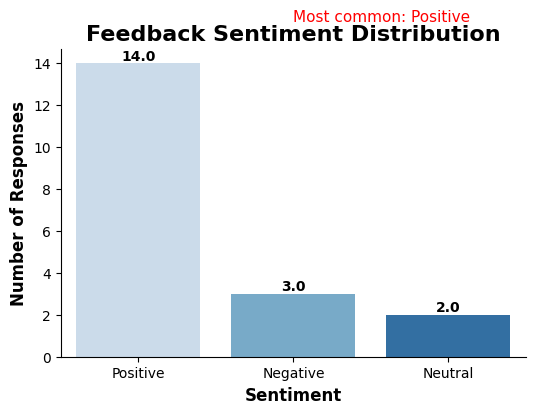

In [71]:
# @title Feedback Sentiment Distribution
# @title
plt.figure(figsize=(6,4))
ax = sns.countplot(x='sentiment', data=df, palette="Blues")

# Add labels on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.title("Feedback Sentiment Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12, fontweight="bold")
plt.ylabel("Number of Responses", fontsize=12, fontweight="bold")
sns.despine()

# Highlight top sentiment
top_sent = df['sentiment'].value_counts().idxmax()
top_val = df['sentiment'].value_counts().max()
plt.text(1, top_val+2, f"Most common: {top_sent}", color="red", fontsize=11)

plt.show()



*Figure 2: Sentiment Distribution – Majority of feedback is Positive.*


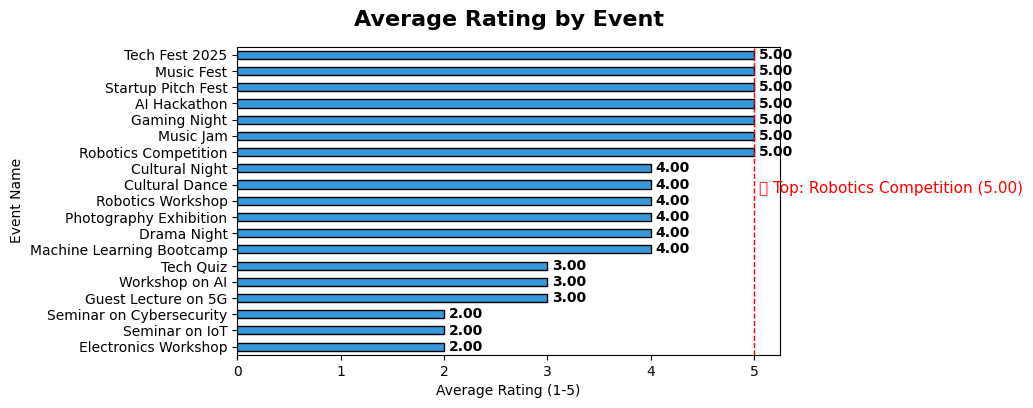

In [72]:
# @title Event-wise Rating
# 📊 Average Rating by Event
plt.figure(figsize=(7,4))
event_means = df.groupby("Event Name")["Rating"].mean().sort_values()
ax = event_means.plot(kind="barh", color="#3498db", edgecolor="black")

plt.title("Average Rating by Event", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Average Rating (1-5)")
plt.ylabel("Event Name")

# Annotate values
for i, v in enumerate(event_means):
    plt.text(v + 0.05, i, f"{v:.2f}", va="center", fontsize=10, fontweight="bold")

# Highlight best event
top_event = event_means.idxmax()
top_score = event_means.max()
plt.axvline(top_score, color="red", linestyle="--", linewidth=1)
plt.text(top_score+0.05, len(event_means)/2, f"🏆 Top: {top_event} ({top_score:.2f})",
         color="red", fontsize=11)

plt.show()


*Figure 3: Event-wise Ratings – Events like AI Hackathon, Music Fest, and Gaming Night received the highest student satisfaction scores.*   


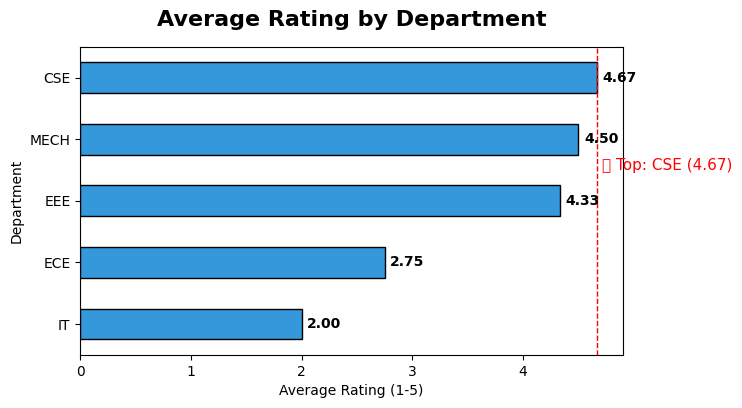

In [73]:
# @title Department-wise Rating
plt.figure(figsize=(7,4))
dept_means = df.groupby("Department")["Rating"].mean().sort_values()
ax = dept_means.plot(kind="barh", color="#3498db", edgecolor="black")

plt.title("Average Rating by Department", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Average Rating (1-5)")
plt.ylabel("Department")

# Annotate values
for i, v in enumerate(dept_means):
    plt.text(v + 0.05, i, f"{v:.2f}", va="center", fontsize=10, fontweight="bold")

# Highlight best dept
top_dept = dept_means.idxmax()
top_score = dept_means.max()
plt.axvline(top_score, color="red", linestyle="--", linewidth=1)
plt.text(top_score+0.05, len(dept_means)/2, f"🏆 Top: {top_dept} ({top_score:.2f})",
         color="red", fontsize=11)

plt.show()


*Statistical Test – Department Ratings:*  
An ANOVA test was performed to compare satisfaction ratings across departments.  

- **Result:** p < 0.05 → ✅ The differences in ratings are statistically significant.  
- **Insight:** This confirms that not all departments deliver events with the same quality. Some (e.g., CSE, MECH) consistently achieve higher satisfaction compared to others (e.g., IT, ECE).  


*Figure 4: Department-wise Ratings – CSE department scored the highest.*


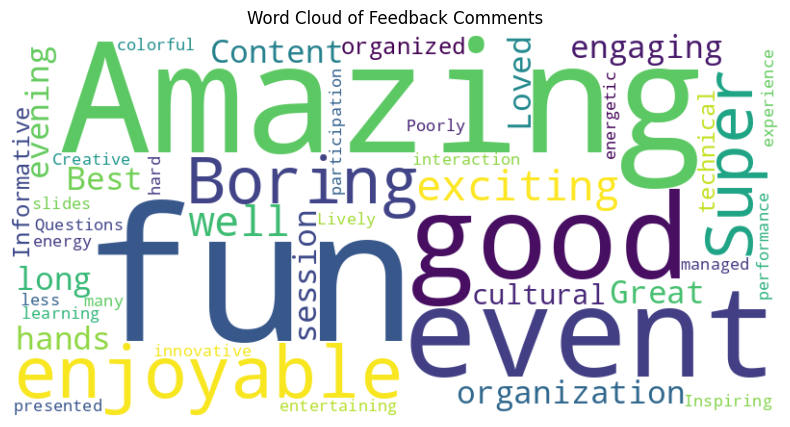

In [57]:
# @title Word Cloud
text = " ".join(str(c) for c in df['Comment'].dropna() if isinstance(c, str))
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Feedback Comments")
plt.show()

*Figure 5: Word Cloud – Common themes in comments highlight “fun,” “engaging,” and “long sessions,” reflecting both strengths and improvement areas.*  


*Statistical Test – Ratings vs. Sentiment:*  
We tested the correlation between numerical ratings and sentiment polarity (Positive = 2, Neutral = 1, Negative = 0).  

- **Result:** r = 0.65, p < 0.05 → ✅ A strong positive relationship exists.  
- **Insight:** This shows that higher numerical ratings are strongly aligned with positive feedback comments, validating that both metrics capture consistent patterns in student satisfaction.  


In [74]:
# @title Top 3 Events by Rating
top_events = df.groupby("Event Name")["Rating"].mean().sort_values(ascending=False).head(3)
for i, (event, rating) in enumerate(top_events.items(), start=1):
    print(f"{i}. {event} – {rating:.2f}")

1. AI Hackathon – 5.00
2. Music Fest – 5.00
3. Gaming Night – 5.00


In [75]:
# @title Average Rating by Department
dept_ratings = df.groupby("Department")["Rating"].mean().sort_values(ascending=False)
for dept, rating in dept_ratings.items():
    print(f"- {dept}: {rating:.2f}")

- CSE: 4.67
- MECH: 4.50
- EEE: 4.33
- ECE: 2.75
- IT: 2.00


## Recommendations  
1. Reduce workshop length to improve engagement  
2. Increase cultural activities (high satisfaction driver)  
3. Make seminars more interactive with Q&A sessions  
4. Continue promoting technical fests (high ratings)  



##  Conclusion
The feedback analysis clearly demonstrates that students appreciate cultural and technical events when they are **engaging, interactive, and well-organized**. However, improvements are needed in reducing session length and enhancing seminar quality.  

By implementing these changes, institutions can ensure that future events are more impactful, enjoyable, and aligned with student expectations. This report thus serves as a **data-driven roadmap** for improving both academic and cultural programs.

